<a href="https://colab.research.google.com/github/DaniilAszn/Applied_statistics/blob/main/1_2_%D0%9E%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описательные статистики

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

## 1. Данные

In [ ]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')
print(df.shape) # размер датафрейма

(19124, 10)


In [ ]:
df.head() # первые пять строк в датафрейме

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [ ]:
df.dtypes # типы данных

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## 2. Описательные статистики

In [ ]:
df['likeCount']

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [ ]:
# index
df['likeCount'].index

RangeIndex(start=0, stop=19124, step=1)

In [ ]:
# values
df['likeCount'].values

array([1.4020e+03, 1.0532e+04, 2.6900e+02, ..., 3.0603e+04, 2.6000e+02,
       2.2000e+01])

In [ ]:
# максимальное значение
df.likeCount.max() # df['likeCount'].max()

1686810.0

In [ ]:
# минимальное значение
df['likeCount'].min()

0.0

In [ ]:
mx = df['likeCount'].max()
mx

1686810.0

In [ ]:
df['likeCount'] == mx

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: likeCount, Length: 19124, dtype: bool

In [ ]:
# поиск строки, у которой максимальное количество лайков (срез)
df[df['likeCount'] == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


Меры центральной тенденции

In [ ]:
df['likeCount'].mean()

5735.014482758621

In [ ]:
df['likeCount'].median()

100.0

Медиана сильно отличается от среднего => в датасете имеются выбросы

Гистограмма

<Axes: >

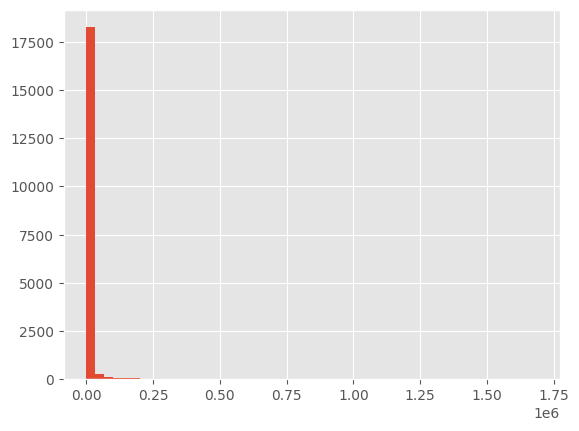

In [ ]:
df['likeCount'].hist(bins=50)

<Axes: >

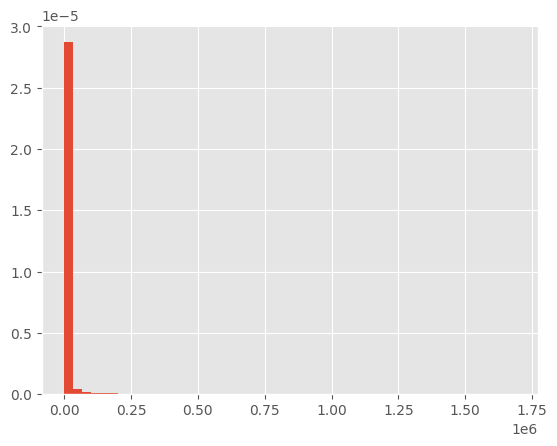

In [ ]:
df['likeCount'].hist(bins=50, density=True)

<Axes: >

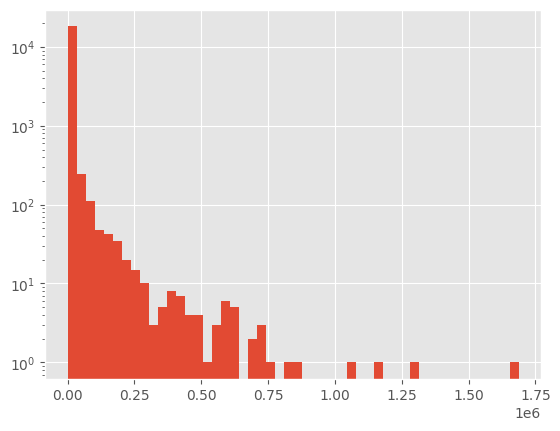

In [ ]:
# Чтоб лучше разглядеть выбросы, перейдём к логарифмической шкале
df['likeCount'].hist(bins=50, log=True)

Меры разброса

In [ ]:
# дисперсия
df['likeCount'].var(ddof=0)

1513365309.7446709

In [ ]:
df['likeCount'].var(ddof=1) # несмещённый вариант

1513445598.6358452

In [ ]:
# стандартное отклонение
df['likeCount'].std(ddof=0)

38901.99621799209

In [ ]:
df['likeCount'].std(ddof=1) # несмещённый вариант

38903.02814223907

Квантили

In [ ]:
df['likeCount'].quantile(0.99)

128146.6499999979

Выходит, что у 99% видео из выборки меньше 128146 лайков, а у 1% - больше

In [ ]:
q = df['likeCount'].quantile(0.99)
x = df[df['likeCount'] > q].music_style
x.value_counts

<bound method IndexOpsMixin.value_counts of 186      popsa
205      popsa
288        rap
305      popsa
306      popsa
         ...  
18672      rap
18680      rap
18692      rap
18693      rap
18698      rap
Name: music_style, Length: 189, dtype: object>

ВСЁ И СРАЗУ

In [ ]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


In [ ]:
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


## 3. Группировка

Посчитаем среднее число лайков для рэпчины

In [ ]:
df[df['music_style'] == 'rap']

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
232,#BSM - Будь собой (official video),156.0,1033.0,1859.0,rap,тимати,558557.0,128.0,20.0,2689
233,#BSM - Будь собой (track),24.0,95.0,230.0,rap,тимати,60981.0,22.0,0.0,2699
234,#BSM COMING SOON,27.0,52.0,225.0,rap,тимати,68296.0,19.0,2.0,2713
235,#GazgolderLive,0.0,38.0,108.0,rap,gazgolder,0.0,NaN,NaN,377
236,#GazgolderLive,0.0,49.0,264.0,rap,gazgolder,0.0,NaN,NaN,378
...,...,...,...,...,...,...,...,...,...,...
19034,бтл булгари федук,12.0,4.0,117.0,rap,feduk,14137.0,10.0,0.0,2745
19047,"г.Неаполь, Италия 2010 год Карина Кокс",6.0,5.0,31.0,rap,тимати,21319.0,NaN,NaN,3074
19078,летний фрист,13.0,7.0,119.0,rap,feduk,9129.0,9.0,0.0,2560
19101,презентация альбома Тимати The Boss в Киеве (У...,3.0,7.0,29.0,rap,тимати,14927.0,2.0,0.0,3319


In [ ]:
# из нового датафрейма, где чисто рэп, мы берём колонку likeCount и счиатем среднее
df[df['music_style'] == 'rap']['likeCount'].mean()

26802.456253089473

Среднее количество лайков для каждого жанра

In [ ]:
Genre = set(df['music_style'])

for genre in Genre:
    like_c = df[df['music_style'] == genre]['likeCount'].mean()
    print(f'{genre}: {like_c}')

shanson: 440.39056420233464
popsa: 7492.273791654158
estrada: 938.686661604657
rap: 26802.456253089473
classic: 28663.333333333332
indi: 2471.8422991893885
rock: 2132.88706083976


In [ ]:
# group by

df.groupby('music_style')['likeCount'].mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

Можно использовать несколько:
1. агрегатных функций

In [ ]:
df.groupby('music_style')['likeCount'].agg(['mean', 'count'])

,mean,count
music_style,,
classic,28663.333333,297
estrada,938.686662,3951
indi,2471.842299,1357
popsa,7492.273792,3331
rap,26802.456253,2023
rock,2132.887061,5835
shanson,440.390564,2056


Можно использовать несколько:
1. агрегатных функций
2. штук для чего агрегируем

In [ ]:
df.groupby('music_style')[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                     mean count         mean count
music_style                                       
classic      28663.333333   297  1236.228956   297
estrada        938.686662  3951   173.565933  3951
indi          2471.842299  1357   220.419307  1357
popsa         7492.273792  3331   790.161513  3331
rap          26802.456253  2023  4099.575383  2023
rock          2132.887061  5835   287.698201  5835
shanson        440.390564  2056    45.488327  2056

Можно использовать несколько:
1. агрегатных функций
2. штук для чего агрегируем
3. полей группировки

In [ ]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.216495   485
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    17.040346   347

[111 rows x 4 columns]

In [ ]:
# есть ли под видео комментарий
df['is_comment'] = 1 * (df['commentators_uniq'] > 0)
(df['commentators_uniq'] > 0).sum()
df['is_comment'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        1
4        1
        ..
19119    0
19120    1
19121    1
19122    1
19123    0
Name: is_comment, Length: 19124, dtype: int64>

## 4. Apply

Выведем длину каждой песни

In [ ]:
# apply

df['title'].apply(len)[:10]

0    25
1    41
2    75
3    38
4    30
5    48
6    36
7    43
8    29
9    56
Name: title, dtype: int64

In [ ]:
df['title'].apply(len).mean() # средняя длина названия

35.293871574984315

Apply может использовать функции, которые мы сами написали

In [ ]:
def firstSymbol(string_name: str) -> str:
    return string_name[0]

print(firstSymbol('Danya'))

D


In [ ]:
df['title'].apply(firstSymbol)

0        "
1        "
2        "
3        "
4        "
        ..
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, Length: 19124, dtype: object

In [ ]:
df['title'].apply(lambda string_name: string_name[0])

0        "
1        "
2        "
3        "
4        "
        ..
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, Length: 19124, dtype: object

## 5. Гистограммы

(array([ 251.,  297.,  312.,  450.,  595.,  879., 1091.,  712.,  609.,
         304.,  377.,  267.,  191.,  289.,  243.,  275.,  264.,  212.,
         262.,  209.,  270.,  248.,  209.,  189.,  290.,  190.,  216.,
         225.,  142.,  183.,  220.,  294.,  402.,  462.,  379.,  176.,
         152.,  104.,  286.,  218.,  270.,  104.,  166.,  202.,  125.,
         104.,  152.,  182.,  198.,  144.,  110.,  159.,  150.,  113.,
         157.,  117.,  173.,  200.,  168.,  239.,  115.,  111.,  235.,
         257.,  288.,  187.,  244.,  152.,   94.,  206.,  139.,  105.,
          83.,  139.,  126.,   99.,   39.,   50.,   29.,   27.,   21.,
          16.,   10.,   55.,    9.,    7.,   11.,   18.,    6.,    6.,
           2.,    9.,   14.,   13.,    6.,    7.,    9.,    0.,    0.,
           3.]),
 array([   0.  ,   45.74,   91.48,  137.22,  182.96,  228.7 ,  274.44,
         320.18,  365.92,  411.66,  457.4 ,  503.14,  548.88,  594.62,
         640.36,  686.1 ,  731.84,  777.58,  823.32,  869.06

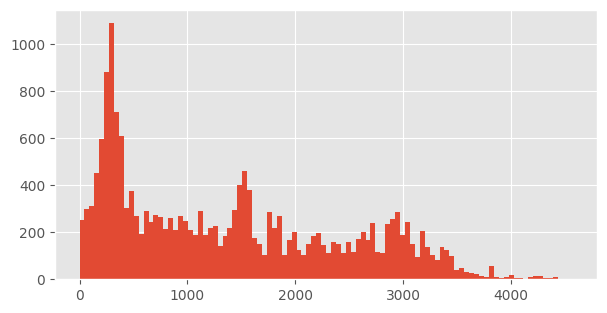

In [ ]:
plt.figure(figsize=(7, 3.5))
plt.hist(df['video_age'], bins=100)

Text(0.5, 1.0, 'Распределение возраста видео')

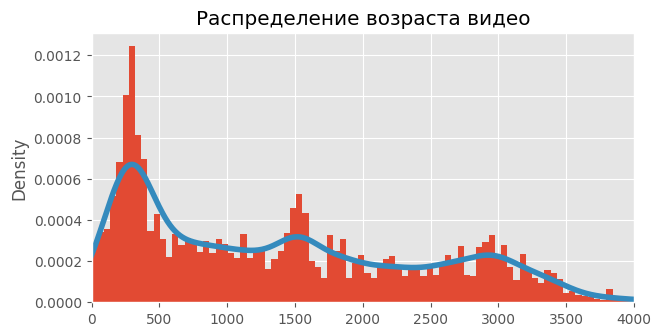

In [ ]:
plt.figure(figsize=(7, 3.5))

df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title('Распределение возраста видео')

array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

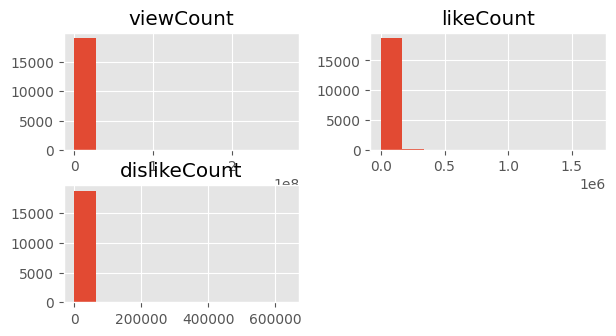

In [ ]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(7, 3.5))

Логарифмирование по у

array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

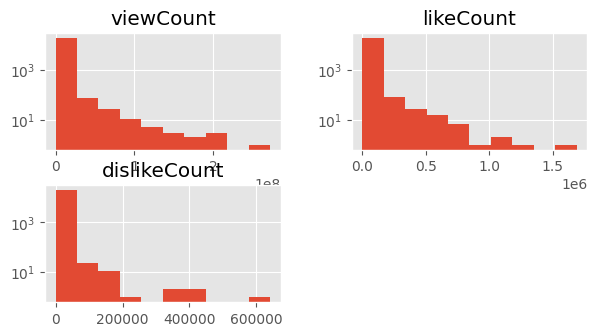

In [ ]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(7, 3.5), log=True)

Логарифмирование по х

In [ ]:
df[columns].apply(lambda x: np.log(x + 1))

,viewCount,likeCount,dislikeCount
0,12.275142,7.246368,3.784190
1,14.613657,9.262268,6.538140
2,10.604801,5.598422,2.397895
3,9.384966,5.099866,2.079442
4,11.423919,6.393591,2.995732
...,...,...,...
19119,7.010312,2.484907,0.000000
19120,12.878601,7.516433,6.068426
19121,13.987227,10.328886,9.648273
19122,9.225032,5.564520,2.397895


array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

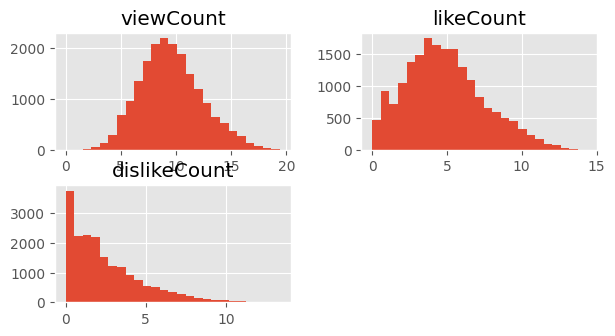

In [ ]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(7, 3.5), bins=25)

## 6. Усатые ящики

In [ ]:
df_log = df[columns].apply(lambda x: np.log(x + 1))
df_log['music_style'] = df['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.275142,7.246368,3.784190,popsa
1,14.613657,9.262268,6.538140,popsa
2,10.604801,5.598422,2.397895,popsa
3,9.384966,5.099866,2.079442,popsa
4,11.423919,6.393591,2.995732,popsa


Text(0, 0.5, 'Количество лайков')

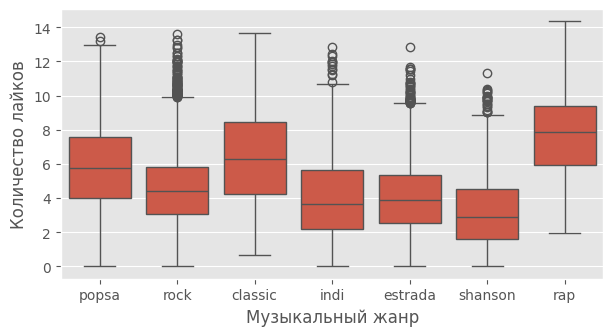

In [ ]:
plt.figure(figsize=(7, 3.5))
sns.boxplot(x='music_style', y='likeCount', data=df_log)
plt.xlabel('Музыкальный жанр')
plt.ylabel('Количество лайков')

не совсем ящик, не совсем с усами

Text(0, 0.5, 'Количество лайков')

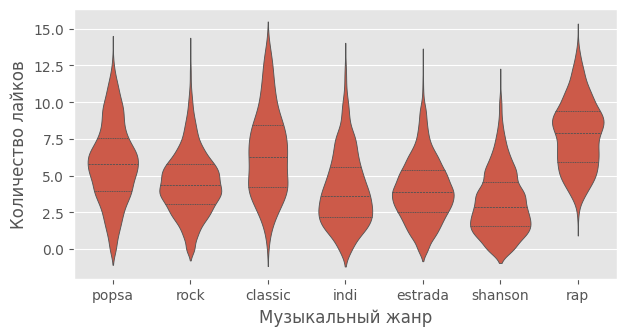

In [ ]:
plt.figure(figsize=(7, 3.5))
sns.violinplot(x='music_style', y='likeCount', data=df_log, inner='quartile')
plt.xlabel('Музыкальный жанр')
plt.ylabel('Количество лайков')

# Сессия ответов на вопросы

## 1. Сколько наблюдений?

In [ ]:
df.shape

(19124, 11)

In [ ]:
df.size

210364

## 2. Сколько уникальных испольнителей в данных?

In [ ]:
len(set(df['performer']))

111

In [ ]:
len(df['performer'].unique())

111

In [ ]:
df['performer'].unique().shape # или .size (вектор же одномерный)

(111,)

## 3. Выведите троих исполнителей, у которых больше всего клипов

In [ ]:
df['performer'].value_counts().head(3)

николаев    566
валерия     525
михайлов    516
Name: performer, dtype: int64

In [ ]:
x = list(df['performer'].value_counts()[:3].index)
x

['николаев', 'валерия', 'михайлов']

## 4. Какая доля клипов приходится на рэп?

In [ ]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [ ]:
rap = df[df['music_style'] == 'rap'].shape[0]
rap

2028

In [ ]:
other_genre = df[df['music_style'] != 'rap'].shape[0]
other_genre

17096

In [ ]:
len_music_styles = rap + other_genre
print(rap * 100 / len_music_styles)

10.604476051035348


In [ ]:
(df[df['music_style'] == 'rap'].shape[0]) * 100 / df.shape[0]

10.604476051035348

## 5. Какая доля приходится на разные жанры?

In [ ]:
y = (df['music_style'].value_counts()) * 100 / df.shape[0]
y

rock       30.788538
estrada    21.705710
popsa      17.459736
shanson    10.777034
rap        10.604476
indi        7.106254
classic     1.558251
Name: music_style, dtype: float64

<Axes: >

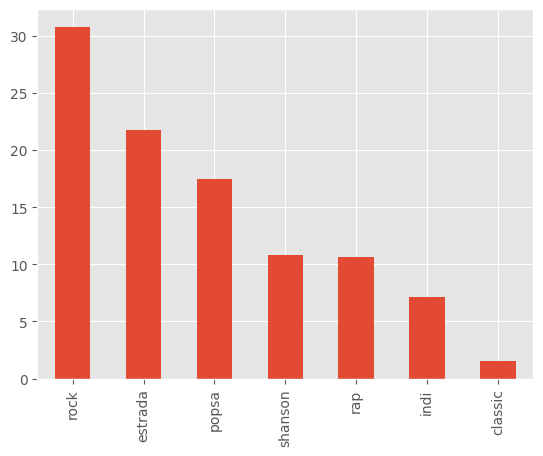

In [ ]:
y.plot(kind='bar')

## 6. Сколько исполнителей пишут музыку в разных жанрах?

In [ ]:
df_agg = df.groupby('performer')['music_style'].agg(['nunique'])
(df_agg > 1).sum()

nunique    0
dtype: int64

## 7. Сколько в среднем просмотров под видео с likeCount > 100000 и Commentators_uniq > 50

In [ ]:
df_like = df[df['likeCount'] > 100000]
df_like_comm = df_like[df['commentators_uniq'] > 50]
df_like_comm['viewCount'].mean()

<ipython-input-159-2d1bce001b95>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_like_comm = df_like[df['commentators_uniq'] > 50]


39326558.901869155

In [ ]:
new_df = df[(df['likeCount'] > 100000)&(df['commentators_uniq'] > 50)]
new_df['viewCount'].mean()

39326558.901869155

## 8. Выведите 5% самых популярных исполнителей. В качестве меры популярности используйте разность между медианным числом лайков и дизлайков. Оценку популярности стройте только по исполнителям, собравшим в сумме больше 100000 лайков.

In [ ]:
df_likes = df[df['likeCount'] > 100000]

df_performers = df_likes.groupby('performer')[['likeCount', 'dislikeCount']].median()
df_performers

,likeCount,dislikeCount
performer,,
2маши,212909.0,24583.0
classical_channel,271070.5,10307.5
face,405493.0,54433.0
feduk,381360.0,44912.0
gazgolder,192971.0,16075.0
iowa,159995.0,15828.0
johnyboy,135204.0,17801.0
loboda,163510.0,34707.0
lone,196011.5,16396.0


In [ ]:
df_performers['popularity'] = df_likes.groupby('performer')['likeCount'].median() - df_likes.groupby('performer')['dislikeCount'].median()
df_performers

,likeCount,dislikeCount,popularity
performer,,,
2маши,212909.0,24583.0,188326.0
classical_channel,271070.5,10307.5,260763.0
face,405493.0,54433.0,351060.0
feduk,381360.0,44912.0,336448.0
gazgolder,192971.0,16075.0,176896.0
iowa,159995.0,15828.0,144167.0
johnyboy,135204.0,17801.0,117403.0
loboda,163510.0,34707.0,128803.0
lone,196011.5,16396.0,179615.5


In [ ]:
q = df_performers['popularity'].quantile(0.95)
q

337304.9

In [ ]:
df_performers[df_performers['popularity'] > q]['popularity'].sort_values(ascending=False)

performer
miyagi&эндшпиль    701683.0
face               351060.0
лсп                337350.0
Name: popularity, dtype: float64